<a href="https://colab.research.google.com/github/jobsiggang/2026_AI_Datascience/blob/main/2026kerisdata4~5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install koreanize-matplotlib -q

In [2]:
import koreanize_matplotlib
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 데이터 수집 및  탐색
https://data.kma.go.kr접속 [기후통계분석] > [조건별 통계]

In [3]:
# 1. 기온 데이터 불러오기
df_temp = pd.read_csv(
    'https://raw.githubusercontent.com/jobsiggang/2026_AI_Datascience/refs/heads/main/ulsan_temp.csv', encoding='cp949')
df_temp.head()

,지점번호,지점명,일시,평균기온(℃),최고기온(℃),\t최고기온시각,최저기온(℃),최저기온시각,일교차
0,152,울산,2015-01-01,-2.7,0.4,15:06,-4.9,07:48,5.3
1,152,울산,2015-01-02,-1.0,2.9,13:09,-4.5,00:48,7.4
2,152,울산,2015-01-03,1.0,7.4,15:40,-5.2,06:12,12.6
3,152,울산,2015-01-04,4.4,12.6,14:55,-2.0,07:57,14.6
4,152,울산,2015-01-05,6.9,12.7,15:09,-1.0,05:10,13.7


In [4]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4014 entries, 0 to 4013
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   지점번호     4014 non-null   int64  
 1   지점명      4014 non-null   object 
 2   일시       4014 non-null   object 
 3   평균기온(℃)  4014 non-null   float64
 4   최고기온(℃)  4014 non-null   float64
 5   	최고기온시각  4014 non-null   object 
 6   최저기온(℃)  4014 non-null   float64
 7   최저기온시각   4014 non-null   object 
 8   일교차      4014 non-null   float64
dtypes: float64(4), int64(1), object(4)
memory usage: 282.4+ KB


In [5]:
# 2. 습도 데이터 불러오기
df_humi = pd.read_csv(
    'https://raw.githubusercontent.com/jobsiggang/2026_AI_Datascience/refs/heads/main/ulsan_humi.csv', encoding='cp949')
df_humi.head()

,지점번호,지점명,일시,평균습도(%rh),최저습도(%rh)
0,152,울산,2015-01-01,30.8,17.0
1,152,울산,2015-01-02,36.9,26.0
2,152,울산,2015-01-03,26.9,9.0
3,152,울산,2015-01-04,49.4,33.0
4,152,울산,2015-01-05,66.9,42.0


In [6]:
df_humi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4014 entries, 0 to 4013
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   지점번호       4014 non-null   int64  
 1   지점명        4014 non-null   object 
 2   일시         4014 non-null   object 
 3   평균습도(%rh)  4014 non-null   float64
 4   최저습도(%rh)  4014 non-null   float64
dtypes: float64(2), int64(1), object(2)
memory usage: 156.9+ KB


## 데이터 전처리 및 병합


In [7]:
#데이터 병합
df_merge = pd.merge(df_temp, df_humi, on=["지점번호", "지점명", "일시"], how="inner")
# df_merge = pd.merge(df_temp, df_humi, on=[ "일시"], how="inner") #이 코드로 했을때 문제점을 비교해 보세요.
df_merge.describe()

,지점번호,평균기온(℃),최고기온(℃),최저기온(℃),일교차,평균습도(%rh),최저습도(%rh)
count,4014.0,4014.000000,4014.000000,4014.000000,4014.000000,4014.000000,4014.000000
mean,152.0,14.907250,19.652616,10.752790,8.899826,65.587818,44.287369
std,0.0,8.692792,8.611321,9.134408,3.189354,19.232369,21.095048
min,152.0,-8.700000,-4.900000,-13.600000,1.300000,16.800000,2.000000
25%,152.0,7.600000,12.500000,2.925000,6.700000,50.600000,26.000000
50%,152.0,15.600000,20.500000,10.950000,8.900000,68.600000,44.000000
75%,152.0,22.100000,26.500000,18.600000,11.000000,80.900000,60.000000
max,152.0,31.800000,37.300000,28.100000,19.100000,98.000000,98.000000


In [8]:
# 일시 항목의 형식을 문자열에서 날짜 형식으로 변환
df_merge['일시']=pd.to_datetime(df_merge['일시'])

In [9]:
# ‘연도’와 ‘월’ 항목을 추가
df_merge["연도"] = df_merge["일시"].dt.year
df_merge["월"] = df_merge["일시"].dt.month

In [10]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4014 entries, 0 to 4013
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   지점번호       4014 non-null   int64         
 1   지점명        4014 non-null   object        
 2   일시         4014 non-null   datetime64[ns]
 3   평균기온(℃)    4014 non-null   float64       
 4   최고기온(℃)    4014 non-null   float64       
 5   	최고기온시각    4014 non-null   object        
 6   최저기온(℃)    4014 non-null   float64       
 7   최저기온시각     4014 non-null   object        
 8   일교차        4014 non-null   float64       
 9   평균습도(%rh)  4014 non-null   float64       
 10  최저습도(%rh)  4014 non-null   float64       
 11  연도         4014 non-null   int32         
 12  월          4014 non-null   int32         
dtypes: datetime64[ns](1), float64(6), int32(2), int64(1), object(3)
memory usage: 376.4+ KB


##  통계 분석 및 조건부 데이터 추출

In [11]:
df_merge.describe()

,지점번호,일시,평균기온(℃),최고기온(℃),최저기온(℃),일교차,평균습도(%rh),최저습도(%rh),연도,월
count,4014.0,4014,4014.000000,4014.000000,4014.000000,4014.000000,4014.000000,4014.000000,4014.000000,4014.000000
mean,152.0,2020-06-29 11:59:59.999999744,14.907250,19.652616,10.752790,8.899826,65.587818,44.287369,2019.995017,6.517190
min,152.0,2015-01-01 00:00:00,-8.700000,-4.900000,-13.600000,1.300000,16.800000,2.000000,2015.000000,1.000000
25%,152.0,2017-09-30 06:00:00,7.600000,12.500000,2.925000,6.700000,50.600000,26.000000,2017.000000,4.000000
50%,152.0,2020-06-29 12:00:00,15.600000,20.500000,10.950000,8.900000,68.600000,44.000000,2020.000000,7.000000
75%,152.0,2023-03-29 18:00:00,22.100000,26.500000,18.600000,11.000000,80.900000,60.000000,2023.000000,10.000000
max,152.0,2025-12-27 00:00:00,31.800000,37.300000,28.100000,19.100000,98.000000,98.000000,2025.000000,12.000000
std,0.0,NaN,8.692792,8.611321,9.134408,3.189354,19.232369,21.095048,3.160382,3.446588


In [12]:
df_merge.columns

Index(['지점번호', '지점명', '일시', '평균기온(℃)', '최고기온(℃)', '\t최고기온시각', '최저기온(℃)',
       '최저기온시각', '일교차', '평균습도(%rh)', '최저습도(%rh)', '연도', '월'],
      dtype='object')

In [13]:
df_merge[["평균기온(℃)", "최고기온(℃)", "평균습도(%rh)"]].mean()
df_merge.loc[df_merge["일교차"].idxmax()]

,1930
지점번호,152
지점명,울산
일시,2020-04-14 00:00:00
평균기온(℃),14.4
최고기온(℃),23.2
\t최고기온시각,16:43
최저기온(℃),4.1
최저기온시각,05:36
일교차,19.1
평균습도(%rh),36.0


In [14]:
condition = (df_merge["평균기온(℃)"] >= 5) & (df_merge["평균습도(%rh)"] >= 50)
df_merge[condition]

,지점번호,지점명,일시,평균기온(℃),최고기온(℃),\t최고기온시각,최저기온(℃),최저기온시각,일교차,평균습도(%rh),최저습도(%rh),연도,월
4,152,울산,2015-01-05,6.9,12.7,15:09,-1.0,05:10,13.7,66.9,42.0,2015,1
14,152,울산,2015-01-15,6.5,9.5,10:21,2.5,23:30,7.0,76.3,58.0,2015,1
20,152,울산,2015-01-21,6.2,10.0,13:23,3.2,05:33,6.8,75.8,54.0,2015,1
21,152,울산,2015-01-22,5.5,7.5,14:37,3.3,23:56,4.2,73.5,56.0,2015,1
24,152,울산,2015-01-25,6.3,11.0,16:25,0.0,04:54,11.0,68.9,51.0,2015,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4003,152,울산,2025-12-17,7.8,11.7,14:08,3.7,23:17,8.0,56.1,30.0,2025,12
4005,152,울산,2025-12-19,10.3,16.8,13:24,2.7,06:11,14.1,74.9,51.0,2025,12
4006,152,울산,2025-12-20,13.2,18.5,13:50,7.4,07:20,11.1,78.9,62.0,2025,12
4009,152,울산,2025-12-23,7.1,12.0,14:59,1.2,06:28,10.8,71.3,54.0,2025,12


## 시각화 분석

---




In [15]:
# '월'을 기준으로 그룹화하여, 기온과 습도의 평균을 구합니다.
df_monthly_mean = df_merge.groupby('월')[['평균기온(℃)', '평균습도(%rh)']].mean()

# 결과 확인
print(df_monthly_mean)

      평균기온(℃)  평균습도(%rh)
월                       
1    2.804399  48.760117
2    4.536977  50.037942
3    9.520235  58.090323
4   14.018788  61.882727
5   18.545161  64.270968
6   21.993333  76.140606
7   25.654545  82.386804
8   26.694135  80.311730
9   22.165758  80.797273
10  16.704399  71.437830
11  11.100000  61.310909
12   4.425223  50.656973


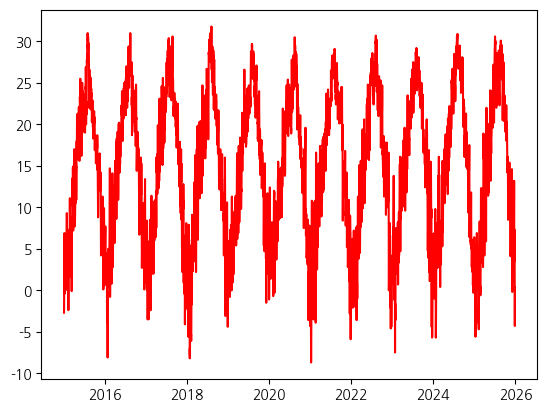

In [16]:
# 일시별 평균기온을 선 그래프를 시각화해 보고 이 지역의 기후적 특성을 분석해 보자.
plt.plot(df_merge['일시'], df_merge['평균기온(℃)'], color='red')
plt.show()

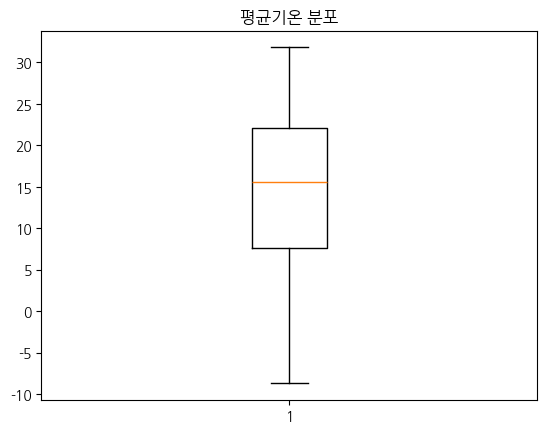

In [17]:
# 평균기온을 박스플롯으로 시각화하고 이 지역의 기후적 특성을 분석해 보자.
plt.boxplot(df_merge['평균기온(℃)'])
plt.title('평균기온 분포') # 제목 추가
plt.show()

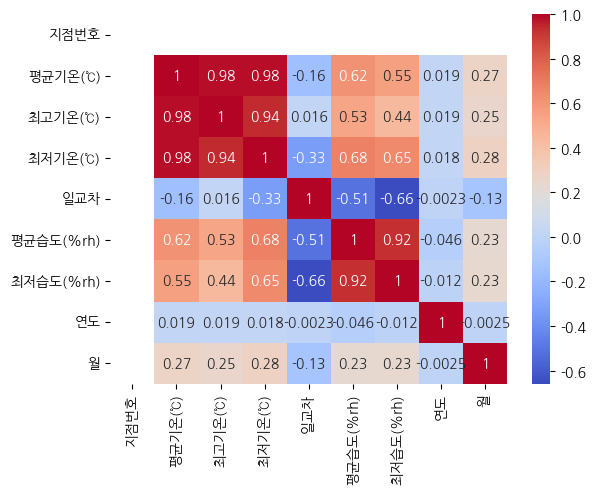

In [18]:
# 수치 데이터를 히트맵으로 시각화하고 기후적 특성을 분석해 보자
sns.heatmap(df_merge.corr(numeric_only='True'), annot=True, cmap='coolwarm')
plt.show()

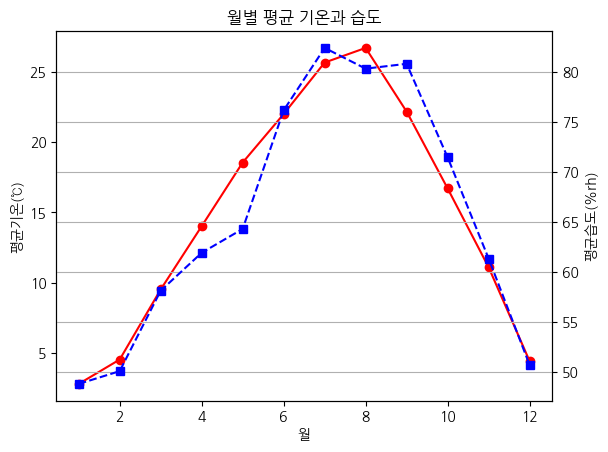

In [21]:
# 그래프에서 기온과 습도가 동시에 높게 나타나는 달은 언제이며, 그 달의 특징은 무엇인가?

fig, ax1 = plt.subplots()

# 평균 기온
ax1.plot(
    df_monthly_mean.index,
    df_monthly_mean['평균기온(℃)'],
    marker='o',color="r"
)
ax1.set_xlabel('월')
ax1.set_ylabel('평균기온(℃)')

# 평균 습도 (이중축)
ax2 = ax1.twinx()
ax2.plot(
    df_monthly_mean.index,
    df_monthly_mean['평균습도(%rh)'],
    marker='s',
    linestyle='--',
    color='b'
)
ax2.set_ylabel('평균습도(%rh)')

plt.title('월별 평균 기온과 습도')
plt.grid(True)
plt.show()
